In [1]:
!pip install pandas

In [0]:
import pandas as pd

In [0]:
pd.set_option('max_colwidth', 50)     # set to default for viewing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# now get our data back
cp drive/'My Drive'/'Colab Notebooks'/vermeer3/vermeer_jv.json .

In [0]:
# and make it a dataframe
vermeer_jv = pd.read_json('vermeer_jv.json')

In [7]:
vermeer_jv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        36 non-null     object
 1   title         36 non-null     object
 2   title2        36 non-null     object
 3   rejectattrib  36 non-null     object
 4   imglink       36 non-null     object
 5   imglink2      36 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


In [8]:
vermeer_jv

,artist,title,title2,rejectattrib,imglink,imglink2
0,Johannes Vermeer (1632-1675),Diana and her Companions,Diana at Her Toilet?,Nicholas Maes [in 1876 purchased as such (cat....,https://www.mauritshuis.nl/en/explore/the-coll...,https://upload.wikimedia.org/wikipedia/commons...
1,Johannes Vermeer (1632-1675),Christ in the House of Mary and Martha,,,https://www.nationalgalleries.org/art-and-arti...,https://upload.wikimedia.org/wikipedia/commons...
2,Johannes Vermeer (1632-1675),The Procuress,The Courtesan,,https://skd-online-collection.skd.museum/Detai...,https://upload.wikimedia.org/wikipedia/commons...
3,Johannes Vermeer (1632-1675),A Maid Asleep,A Girl Asleep; Woman Asleep at a Table,,https://www.metmuseum.org/art/collection/searc...,https://commons.wikimedia.org/wiki/File:A_Maid...
4,Johannes Vermeer (1632-1675),A Girl Reading a Letter,The Letter Reader; A Young Woman Reading a Letter,"""Rembrandt, Pieter de Hooch, Govert Flinck (un...",https://skd-online-collection.skd.museum/Detai...,https://upload.wikimedia.org/wikipedia/commons...
5,Johannes Vermeer (1632-1675),Officer and Laughing Girl,Soldier and the Laughing Girl; Cavalier and Yo...,,https://collections.frick.org/objects/275/offi...,https://upload.wikimedia.org/wikipedia/commons...
6,Johannes Vermeer (1632-1675),The Milkmaid,A Maid-Servant Pouring Out Milk; The Milk-Woman,,https://www.rijksmuseum.nl/en/collection/SK-A-...,https://upload.wikimedia.org/wikipedia/commons...
7,Johannes Vermeer (1632-1675),The Glass of Wine,A Girl Drinking with a Gentleman,,http://www.smb-digital.de/eMuseumPlus?service=...,https://upload.wikimedia.org/wikipedia/commons...
8,Johannes Vermeer (1632-1675),Girl Interrupted at Her Music,The Music Lesson; Young Woman Interrupted at M...,,https://collections.frick.org/objects/273/girl...,https://upload.wikimedia.org/wikipedia/commons...
9,Johannes Vermeer (1632-1675),The Girl with the Wine Glass,"""Young Woman with a Wine Glass; La Coquette; W...",,https://www.3landesmuseen.de/Hollaendische-Mal...,https://commons.wikimedia.org/w/index.php?sear...


### **Now we do image stuff:**

In [9]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/commons/d/df/Johannes_Vermeer_-_Christ_in_the_House_of_Martha_and_Mary_-_WGA24603.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

# summarize some details about the image
print(img.format)
print(img.mode)
print(img.size)

# show the image
img.show()      #  WHY DOES THIS NOT SHOW IMAGE?

JPEG
RGB
(1200, 1357)


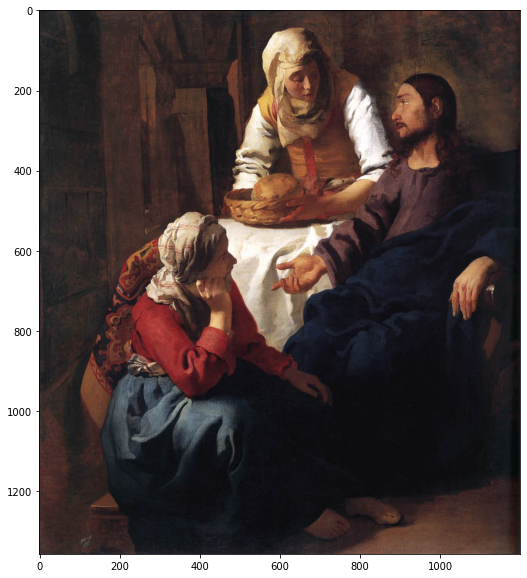

In [22]:
from matplotlib import pyplot as plt      # this is better display
import numpy as np
from PIL import Image

%matplotlib inline

plt.figure(figsize = (20,10))   # 2nd number apparenty is size (??)


# still have image in img from above
plt.imshow(np.asarray(img))

## **Start doing image loop stuff**

Start doing image loop stuff

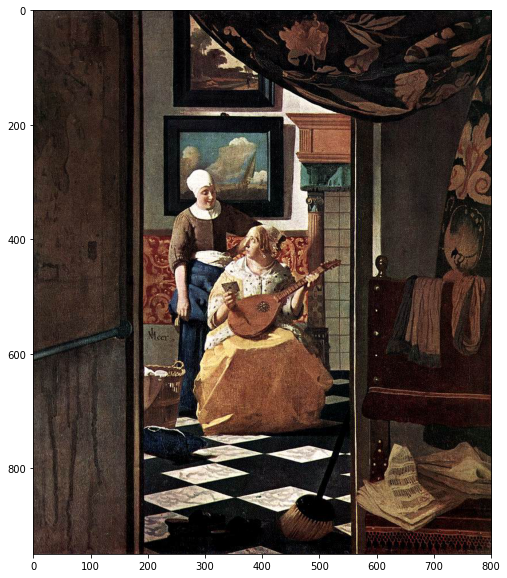

In [70]:
# setup to make sure have it all *************************

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt

pd.set_option('max_colwidth', 1000)    # IMPORTANT TO FIX COLUMN TRUNCATION PROBLEM <!!None does not work>

#fig, axes = plt.subplots(1, n, figsize=(40,10))
plt.figure(figsize = (10,10))
#plt.imshow(np.asarray(img))
#matplotlib inline


vlen = len(vermeer_jv)

imshow(np.asarray(img))   # assume still loaded with img

In [0]:
!pip install validators
import validators

In [0]:
!pip install drawnow


### **Now print out some random images:**

In [80]:
n = 10   # ok up through 2, 3 is bad
random.seed(7)

for i in range(n):
  try:
    r1 = random.randint(0, vlen)
    rurl = vermeer_jv.loc[r1, ['imglink2']]   # select by index
    #print(i, r1, rurl)
    #print("rurl", type(rurl))
    x = rurl[0]
    #print(x)
    srurl = str(x)    # make sure is string
    #print("srrurl", type(srurl))
    valid=validators.url(srurl)
    #print("srurl is: ", valid)
    plt.figure(figsize = (10,10))
    if valid==True:
      print("valid i, r1, rurl, srurl:  ", i, r1, rurl, srurl)
      #print("Url is valid")
      response = requests.get(srurl)           #   ERROR OUT HERE  No connection adapters were found for 'seco      
      #print(r1, srurl)
      img = Image.open(BytesIO(response.content))
      imshow(np.asarray(img))
      # imshow(a) will plot the values of the array a as pixel values, 
      # but it won't display the plot. To view the image after each iteration of the for loop, 
      # you need to add show().
    else:
      print("Invalid url")
  except Exception:   #ignore exeception
      print("Exception!   *******************************************************")
      pass




Output hidden; open in https://colab.research.google.com to view.